In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

from keras.models import Sequential,load_model
from keras.layers import Dense
%matplotlib inline


KeyboardInterrupt: 

In [ ]:
url ='E:\Data Science Projects\datasets\kidney_disease.csv'


In [ ]:
df =pd.read_csv(url)
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
df.shape

(400, 26)

In [ ]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [ ]:
features = ['sg', 'al','sc','hemo', 'pcv','wc', 'rc','classification']

In [ ]:
df =df.drop([col for col in df.columns if not col in features],axis=1)

In [ ]:
df.isnull().sum()

sg                 47
al                 46
sc                 17
hemo               52
pcv                70
wc                105
rc                130
classification      0
dtype: int64

In [ ]:
df =df.dropna(axis=0)

In [ ]:
df.isnull().sum()

sg                0
al                0
sc                0
hemo              0
pcv               0
wc                0
rc                0
classification    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 0 to 399
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sg              240 non-null    float64
 1   al              240 non-null    float64
 2   sc              240 non-null    float64
 3   hemo            240 non-null    float64
 4   pcv             240 non-null    object 
 5   wc              240 non-null    object 
 6   rc              240 non-null    object 
 7   classification  240 non-null    object 
dtypes: float64(4), object(4)
memory usage: 16.9+ KB


In [ ]:
for col in df.columns:
    if (df[col].dtype == 'O'):
        df[col]=LabelEncoder().fit_transform(df[col])
        

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 0 to 399
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sg              240 non-null    float64
 1   al              240 non-null    float64
 2   sc              240 non-null    float64
 3   hemo            240 non-null    float64
 4   pcv             240 non-null    int32  
 5   wc              240 non-null    int32  
 6   rc              240 non-null    int32  
 7   classification  240 non-null    int32  
dtypes: float64(4), int32(4)
memory usage: 13.1 KB


In [ ]:
df['classification'].value_counts()

1    131
0    109
Name: classification, dtype: int64

In [ ]:
X=df.drop(['classification'],axis=1)
y=df['classification']

In [ ]:
scaler = MinMaxScaler()
X[X.columns]=scaler.fit_transform(X)

In [ ]:
X_tr,X_te,y_tr,y_te =train_test_split(X,y,test_size=0.2,shuffle=True)

In [ ]:
import keras as k

In [ ]:
model = Sequential()
model.add(Dense(256,activation='relu',input_dim=len(X.columns),kernel_initializer =k.initializers.random_normal(seed=13)))

In [ ]:
model.add(Dense(1,activation='hard_sigmoid'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               2048      
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 2,305
Trainable params: 2,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history= model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
hist = model.fit(X_tr,y_tr,epochs=20,batch_size=10)

Epoch 1/20
20/20 [==============================] - 1s 2ms/step - loss: 0.6485 - accuracy: 0.5417
Epoch 2/20
20/20 [==============================] - 0s 1ms/step - loss: 0.5725 - accuracy: 0.6771
Epoch 3/20
20/20 [==============================] - 0s 947us/step - loss: 0.5011 - accuracy: 0.7448
Epoch 4/20
20/20 [==============================] - 0s 1ms/step - loss: 0.4229 - accuracy: 0.8021
Epoch 5/20
20/20 [==============================] - 0s 1ms/step - loss: 0.3393 - accuracy: 0.8594
Epoch 6/20
20/20 [==============================] - 0s 959us/step - loss: 0.2613 - accuracy: 0.8906
Epoch 7/20
20/20 [==============================] - 0s 998us/step - loss: 0.2087 - accuracy: 0.9062
Epoch 8/20
20/20 [==============================] - 0s 900us/step - loss: 0.1785 - accuracy: 0.9115
Epoch 9/20
20/20 [==============================] - 0s 1ms/step - loss: 0.1585 - accuracy: 0.9271
Epoch 10/20
20/20 [==============================] - 0s 948us/step - loss: 0.1420 - accuracy: 0.9375
Epoch 11/

#Saved Model

In [ ]:
model.save('ckd.model')

INFO:tensorflow:Assets written to: ckd.model\assets


INFO:tensorflow:Assets written to: ckd.model\assets


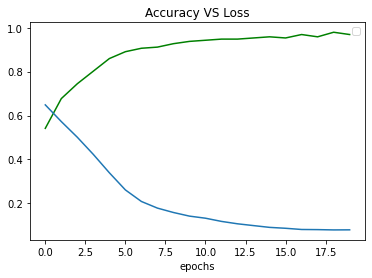

In [ ]:
#Visualize the models loss and accuracy
plt.plot(hist.history['accuracy'],color='green')
plt.plot(hist.history['loss'])
plt.title('Accuracy VS Loss')
plt.xlabel('epochs')
plt.legend()
plt.show() 
# Plot training set history for Loss

In [ ]:
print(X_tr.shape,'\n',X_te.shape)

(192, 7) 
 (48, 7)


In [ ]:
preds = model.predict(X_te)

2/2 [==============================] - 0s 2ms/step


In [ ]:
preds

array([[0.9872205 ],
       [0.93559015],
       [0.9553994 ],
       [0.81792957],
       [0.        ],
       [0.9476191 ],
       [1.        ],
       [1.        ],
       [0.24521506],
       [0.5594454 ],
       [1.        ],
       [1.        ],
       [0.97594243],
       [0.        ],
       [0.6341974 ],
       [0.        ],
       [0.9327611 ],
       [0.        ],
       [0.7480404 ],
       [0.91940486],
       [1.        ],
       [1.        ],
       [0.        ],
       [1.        ],
       [0.7922391 ],
       [0.3140982 ],
       [0.8896829 ],
       [0.29370245],
       [0.8031695 ],
       [0.        ],
       [1.        ],
       [1.        ],
       [0.89434564],
       [1.        ],
       [0.        ],
       [1.        ],
       [0.        ],
       [0.        ],
       [0.8412229 ],
       [1.        ],
       [1.        ],
       [0.94962895],
       [0.2215549 ],
       [0.9926678 ],
       [1.        ],
       [0.        ],
       [1.        ],
       [0.   

In [ ]:
df.sample(5)

,sg,al,sc,hemo,pcv,wc,rc,classification
260,1.020,0.0,1.0,14.1,27,79,31,1
214,1.015,0.0,1.0,13.7,0,38,30,0
124,1.015,0.0,2.5,9.1,10,44,12,0
298,1.020,0.0,1.2,13.5,30,73,26,1
358,1.020,0.0,1.2,13.0,27,41,34,1


In [ ]:
q =[[1.020,0.0,0.7,15.0,25,77,36]]

In [ ]:
print(model.predict(q))

1/1 [==============================] - 0s 81ms/step
[[1.]]


In [ ]:
pred=[1 if y>=0.5 else 0 for y in preds ]

In [ ]:
pred

[1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0]

In [ ]:
Original =[x for x in y_te]
Predicted =[x for x in pred]

In [ ]:
final_df =pd.DataFrame({'Actual':Original,'Predicted':Predicted})

In [ ]:
final_df

,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,0,0
5,1,1
6,1,1
7,1,1
8,0,0
9,0,1


In [ ]:
import joblib

In [ ]:
loaded_model = joblib.load('E:\Data Science Projects\ckd.model')

PermissionError: [Errno 13] Permission denied: 'E:\\Data Science Projects\\ckd.model'